Questo link vale come oro per le `data.table`

https://stackoverflow.com/questions/1727772/quickly-reading-very-large-tables-as-dataframes-in-r/15058684#15058684

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/datatable_Cheat_Sheet_R.pdf

In [8]:
library(data.table)
library(ggplot2)

In [9]:
list.files(path="../../log/2018_13_12_17_02_57")

[1] "activationLog2018_13_12_17_02_57.csv"
 [2] "clustering2018_13_12_17_02_57.csv"   
 [3] "config2018_13_12_17_02_57.ini"       
 [4] "connectionLog2018_13_12_17_02_57.csv"
 [5] "degree_distr2018_13_12_17_02_57.csv" 
 [6] "diameter2018_13_12_17_02_57.csv"     
 [7] "graph2018_13_12_17_02_57.gml"        
 [8] "kcore2018_13_12_17_02_57.csv"        
 [9] "memoryLog2018_13_12_17_02_57.csv"    
[10] "messageLog2018_13_12_17_02_57.csv"

In [26]:
which(list.files(path="../../log/2018_13_12_17_02_57") == "activationLog2018_13_12_17_02_57.csv") ## check if file exist

[1] 1

In [29]:
system.time(DT <- fread("../../log/2018_13_12_17_02_57/activationLog2018_13_12_17_02_57.csv", skip=12, sep=","))

             user            system           elapsed 
0.001000000000000 0.000000000000000 0.000999999999976 

In [30]:
names(DT) ## come csv normale

[1] "agent" "time"  "type"  "dtime"

Reads all column having time == 1

In [32]:
subset(DT, time == 4) ## come csv normale legge tutte le colonne aventi time == 1

agent,time,type,dtime
41,4,d,2
39,4,u,1
40,4,u,1
10,4,u,1
63,4,u,1
21,4,u,1
18,4,u,1
72,4,d,2
71,4,d,2
47,4,u,1


find alla the news in database, remove duplicates and '0'

In [14]:
newsvec <- DT[,'news0']
newsvec <- as.vector(t(newsvec))
newsvec <- unique(newsvec)
newsvec <- newsvec[!newsvec=='0']
newsvec

[1] "7iGFQkdw1LnO9teq"

In [15]:
newsvec[1]

[1] "7iGFQkdw1LnO9teq"

In [16]:
DT

agent,time,state,spreadstate,news0,news1,news2,news3,news4,news5,news6,news7,news8,news9,news10,news11
47,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
1,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
2,1,d,i,0,0,0,0,0,0,0,0,0,0,0,0
3,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
4,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
5,1,d,i,0,0,0,0,0,0,0,0,0,0,0,0
6,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
7,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
8,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0
9,1,u,i,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
sum(apply(subset(DT, time == 80),1,function(x) length(which(x==newsvec[0]))))

[1] 0

find max time of iteration

In [35]:
maxtime = DT[][which.max(time)]$time
maxtime

[1] 14

In [34]:
TB <- data.table(n1=integer())
for (i in 1:maxtime) {
    nn1 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[1]))))
    #nn2 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[2]))))
    #nn3 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[3]))))
    #nn4 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[4]))))
    #nn5 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[5]))))
    #nn6 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[6]))))
   
    TB <- rbindlist(list(TB,  data.table(n1=nn1)))
}
TB

n1
0
0
0
0
0
0
0
0
0
0


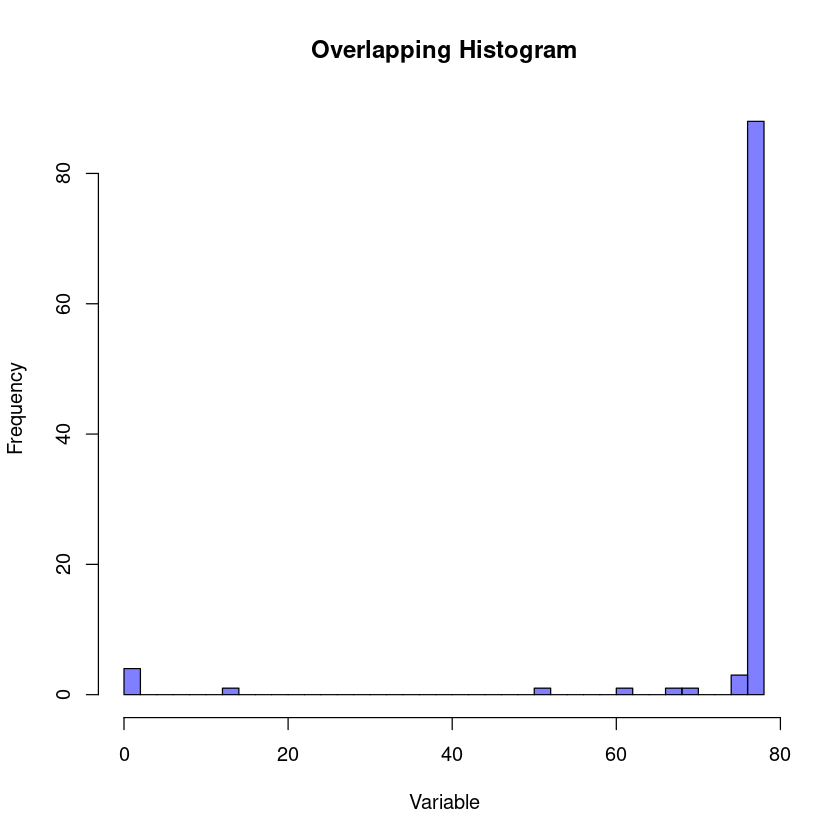

In [23]:
# Histogram Colored (blue and red)
hist(TB$n1, col=rgb(0,0,1,0.5),main="Overlapping Histogram", xlab="Variable", breaks=50)
#hist(TB$n5, col=rgb(1,0,0,0.5), add=T, breaks=50)
#hist(TB$n3, col=rgb(0,1,0,0.5), add=T, breaks=50)
#box()
#vita media circa 50/100

In [36]:
up <- data.frame(length = TB$u)
do <- data.frame(length = TB$d)

up$num <- 'Up Ag.'
do$num <- 'Down Ag.'

gLengths <- rbind(up, do)

ERROR: Error in `$<-.data.frame`(`*tmp*`, num, value = "Up Ag."): replacement has 1 row, data has 0


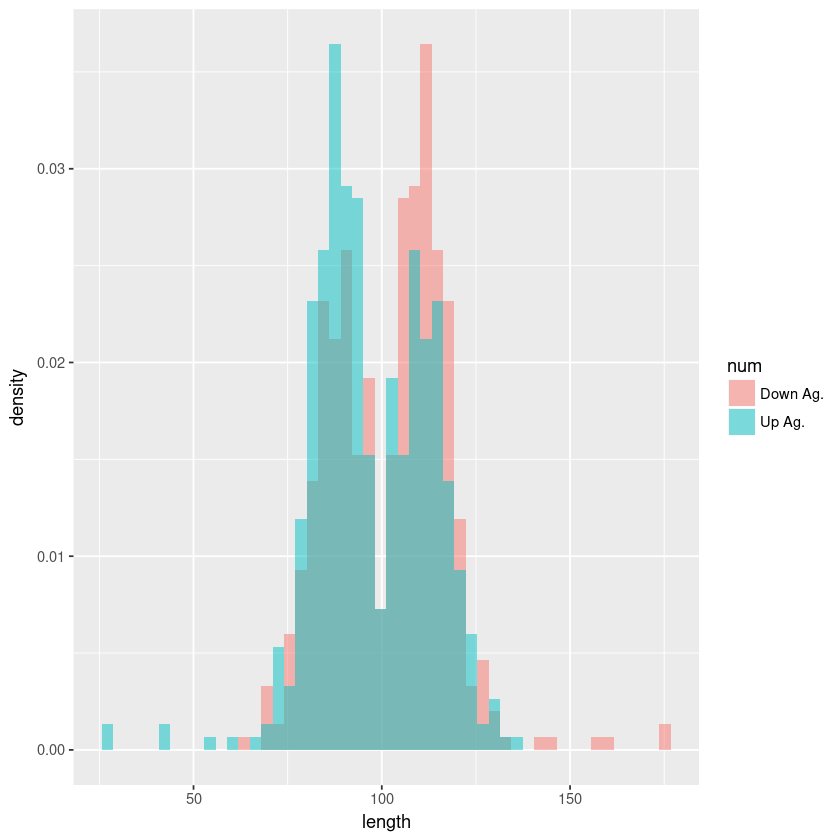

In [89]:
ggplot(gLengths, aes(length, fill = num)) + geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity', bins=50)

In [73]:
upag <- data.frame(length = v, weight = TB$u)
doag <- data.frame(length = v, weight = TB$d)

#Now, combine your two dataframes into one.  First make a new column in each that will be a variable to identify where they came from later.
upag$num <- 'Up Ag.'
doag$num <- 'Down Ag.'

#and combine into your new data frame vegLengths
agLengths <- rbind(upag, doag)

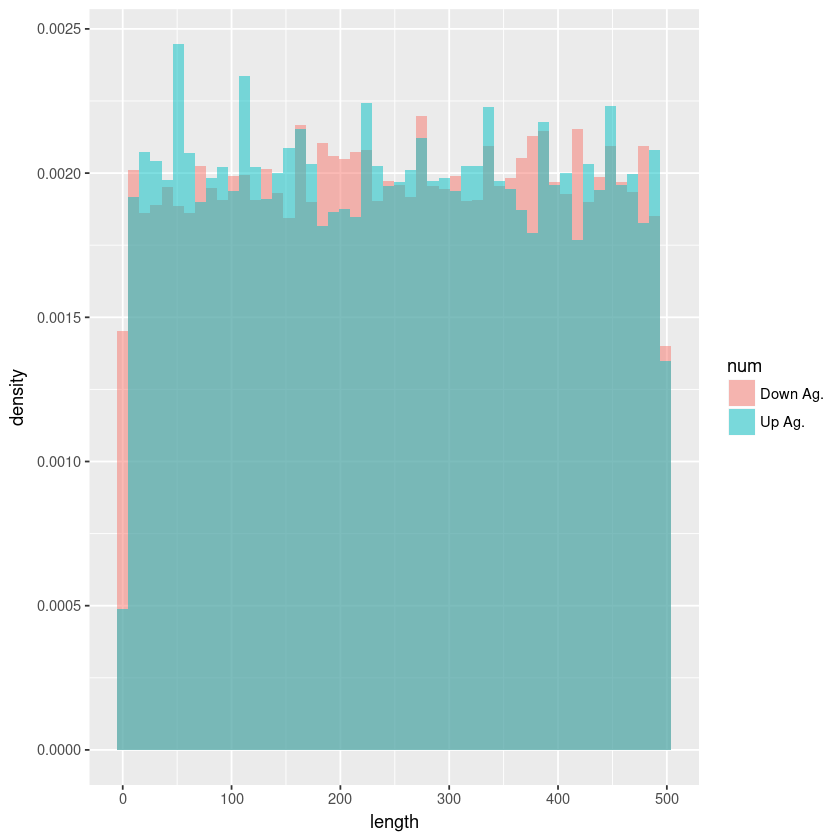

In [74]:
ggplot(agLengths, aes(length, weight = weight, fill = num)) + geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity', bins=50)